# MSCA 31009 Machine Learning & Predictive Analytics
## Final Project - Steam Game Recommendation System
### Exploratory Data Analysis
Shijia Huang

-----

In [1]:
# Import basic libraries
import sys
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential, load_model

2023-05-14 22:01:44.664156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [4]:
import multiprocessing as mp

num_processors = mp.cpu_count()
print(f'Available CPUs: {num_processors}')

Available CPUs: 12


## Games

In [6]:
# read in the preprocessed data
games_df = pd.read_csv('preprocessed/games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48756 entries, 0 to 48755
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          48756 non-null  int64  
 1   title           48756 non-null  object 
 2   date_release    48756 non-null  object 
 3   win             48756 non-null  int64  
 4   mac             48756 non-null  int64  
 5   linux           48756 non-null  int64  
 6   rating          48756 non-null  int64  
 7   positive_ratio  48756 non-null  int64  
 8   user_reviews    48756 non-null  int64  
 9   price_final     48756 non-null  float64
 10  price_original  48756 non-null  float64
 11  discount        48756 non-null  float64
 12  steam_deck      48756 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 4.8+ MB


In [7]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,1,0,0,3,92,37039,19.99,19.99,0.0,1
1,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,3,84,2199,9.99,9.99,0.0,1
2,22364,BRINK: Agents of Change,2011-08-03,1,0,0,2,85,21,2.99,2.99,0.0,1
3,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,3,92,3722,14.99,14.99,0.0,1
4,226560,Escape Dead Island,2014-11-18,1,0,0,0,61,873,14.99,14.99,0.0,1


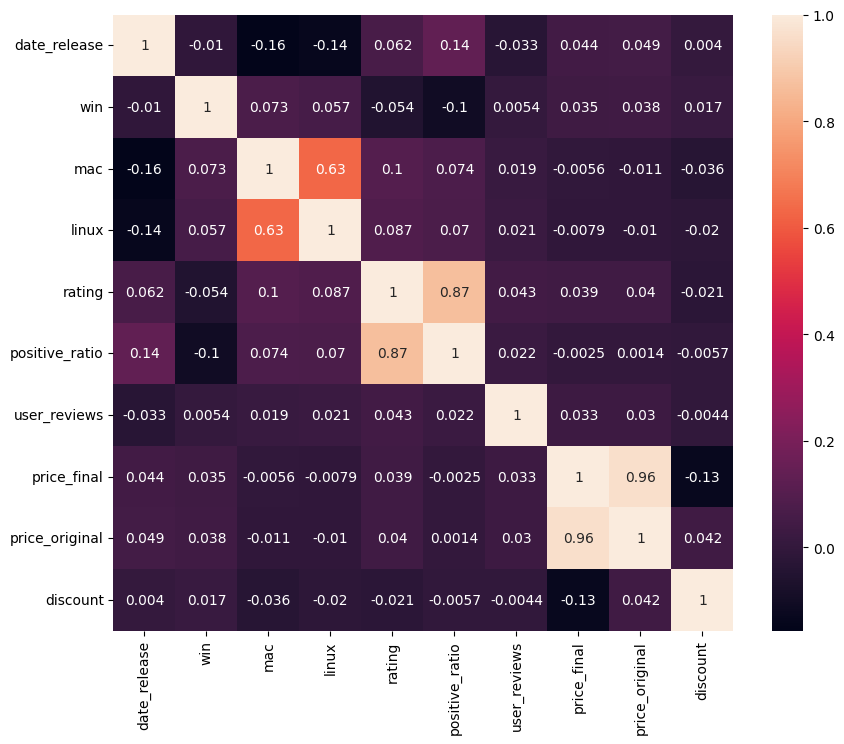

In [ ]:
# plot correlation between numerical columns
plt.figure(figsize=(10, 8))
cols = ['date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']
sns.heatmap(games_df[cols].corr(), annot=True)
plt.show()

In [ ]:
# make pairplot for numerical columns where diagonal is a histogram and other plots are scatter plots
sns.pairplot(games_df[cols], diag_kind='hist')
plt.show()


KeyboardInterrupt: 

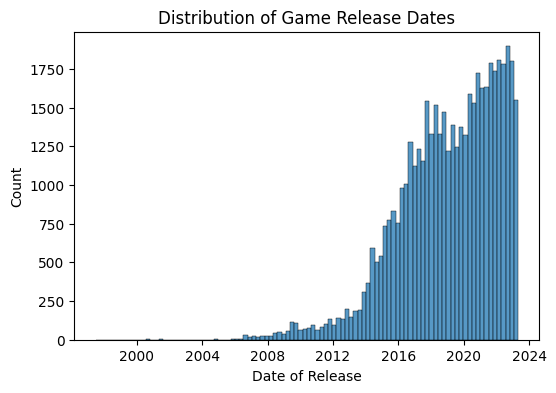

In [ ]:
# plot distribution of date_release
plt.figure(figsize=(6, 4))
sns.histplot(data=games_df, x='date_release', bins=100)
plt.title('Distribution of Game Release Dates')
plt.xlabel('Date of Release')
plt.ylabel('Count')
plt.show()

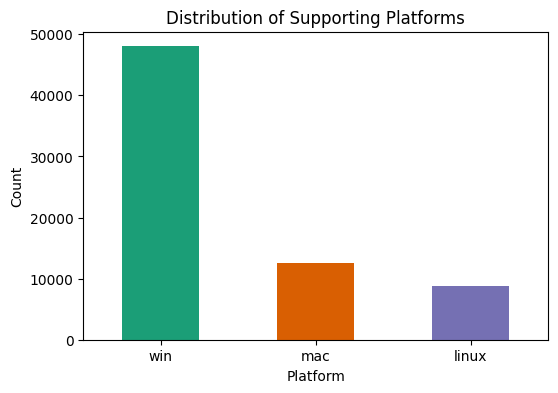

In [ ]:
# plot supporting platforms: win, mac, linux using bar plot

# Calculate the count of each platform combination
subset_df = games_df[['win', 'mac', 'linux']]
platform_counts = subset_df.sum()

# Plot the stacked bar plot
plt.figure(figsize=(6, 4))
platform_counts.plot(kind='bar', stacked=True, color=['#1b9e77', '#d95f02', '#7570b3'])
plt.title('Distribution of Supporting Platforms')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()


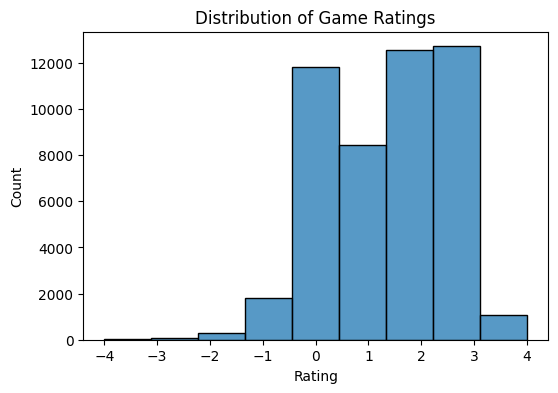

In [ ]:
# plot distribution of rating
plt.figure(figsize=(6, 4))
sns.histplot(data=games_df, x='rating', bins=9)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

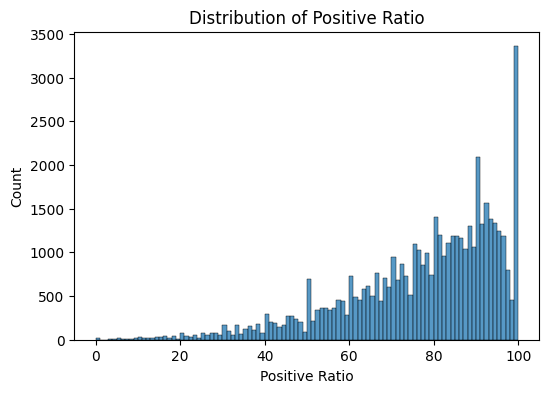

In [ ]:
# plot distribution of positive_ratio
plt.figure(figsize=(6, 4))
sns.histplot(data=games_df, x='positive_ratio', bins=100)
plt.title('Distribution of Positive Ratio')
plt.xlabel('Positive Ratio')
plt.ylabel('Count')
plt.show()

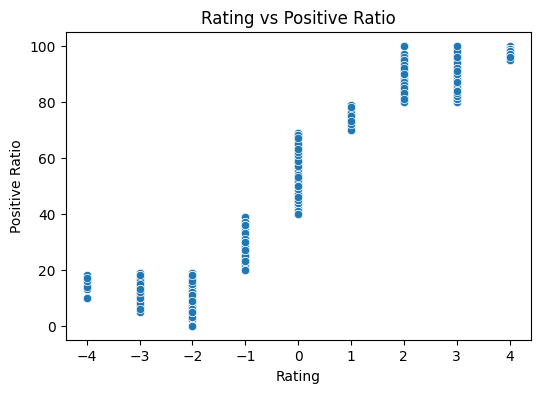

In [ ]:
# rating vs positive_ratio
plt.figure(figsize=(6, 4))
sns.scatterplot(data=games_df, x='rating', y='positive_ratio')
plt.title('Rating vs Positive Ratio')
plt.xlabel('Rating')
plt.ylabel('Positive Ratio')
plt.show()

## Users

In [ ]:
# read in the preprocessed data
users_df = pd.read_csv('preprocessed/users.csv')
users_df.info()

In [ ]:
users_df.head()

## Reviews

In [ ]:
# read in the preprocessed data
reviews_df = pd.read_csv('preprocessed/reviews.csv')
reviews_df.info()

In [ ]:
reviews_df.head()

## User Reviews

# read in preprocessed data
users_reviews_df = pd.read_csv('preprocessed/users_reviews.csv')